#**Preprocessing**

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.precision",2)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Projects/Disease_or_no_disease/Translated_Modifizierte-Daten-Zusammengefasst.csv')
df

,Case Number,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,...,Platelets Preop,Platelets Max Postop,Platelets Min Postop,Other Neurological Diseases,History of Stroke,Alzheimer's/Dementia History,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,8210722,0,105.77,55,n,3,n,y,y,n,...,262.00,530.00,220.00,0.00,0.00,0.00,0.00,0.00,3.00,57.10
1,8199631,0,76.44,55,n,3,n,n,n,y,...,236.00,275.00,126.00,0.00,0.00,0.00,0.00,0.00,3.00,77.00
2,8053813,0,68.06,60,n,2,n,n,n,y,...,196.00,340.00,101.00,0.00,0.00,0.00,1.00,0.00,3.00,63.60
3,8152489,0,71.19,60,y,4,n,n,n,y,...,194.00,251.00,125.00,0.00,0.00,0.00,0.00,0.00,3.00,51.40
4,8054854,0,96.67,60,y,3,n,n,n,n,...,NaN,347.00,172.00,0.00,0.00,0.00,0.00,0.00,4.00,53.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,8116430,1,49.44,10,y,3,n,n,n,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.00
260,8200765,1,59.89,25,n,4,n,n,n,y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.10
261,8279161,1,20.87,40,n,3,y,n,n,y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.70
262,8055748,1,50.60,55,n,3,n,y,y,y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.80


##Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 101 entries, Case Number to Age at Surgery
dtypes: float64(81), int64(4), object(16)
memory usage: 208.4+ KB


In [ ]:
df.describe()

,Case Number,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),NYHA Class,Log EuroSCORE (%),"Gender (1 = Male, 0 = Female)","Coronary Heart Disease (1, 2, or 3 vessels)",Height (cm),Weight (kg),...,Platelets Preop,Platelets Max Postop,Platelets Min Postop,Other Neurological Diseases,History of Stroke,Alzheimer's/Dementia History,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
count,264.00,264.00,264.00,264.00,264.00,264.00,258.00,258.00,258.00,258.00,...,251.00,258.00,258.00,258.00,258.00,258.00,258.00,258.00,246.00,264.00
mean,8149792.48,0.05,88.08,51.39,2.83,0.03,0.83,2.81,173.96,84.64,...,235.98,429.06,136.41,0.01,0.06,0.00,0.12,0.00,14.16,67.84
std,76157.31,0.22,31.24,11.24,0.67,0.06,0.37,0.43,8.68,15.30,...,61.29,147.75,40.59,0.09,0.24,0.00,0.33,0.06,8.63,9.26
min,8010344.00,0.00,6.22,10.00,1.00,0.00,0.00,1.00,147.00,52.00,...,74.00,115.00,41.00,0.00,0.00,0.00,0.00,0.00,3.00,43.70
25%,8080916.50,0.00,67.96,40.00,2.75,0.01,1.00,3.00,169.00,74.00,...,196.50,318.75,108.00,0.00,0.00,0.00,0.00,0.00,10.00,61.50
50%,8143195.50,0.00,83.90,55.00,3.00,0.02,1.00,3.00,175.00,83.50,...,232.00,415.00,133.00,0.00,0.00,0.00,0.00,0.00,13.00,68.75
75%,8210788.00,0.00,105.36,60.00,3.00,0.03,1.00,3.00,180.00,93.00,...,266.50,530.75,161.00,0.00,0.00,0.00,0.00,0.00,16.00,75.60
max,8295841.00,1.00,234.30,75.00,4.00,0.64,1.00,3.00,198.00,156.00,...,415.00,932.00,259.00,1.00,1.00,0.00,1.00,1.00,90.00,87.20


In [ ]:
df["Therapy-Relevant Delirium (1 = Yes)"].unique()

array([ 0.,  1., nan])

In [ ]:
df["Therapy-Relevant Delirium (1 = Yes)"].value_counts(normalize=True)

,proportion
Therapy-Relevant Delirium (1 = Yes),
0.00,0.79
1.00,0.21


In [ ]:
df["Therapy-Relevant Delirium (1 = Yes)"].value_counts()

,count
Therapy-Relevant Delirium (1 = Yes),
0.00,203
1.00,55


##Data Cleaning

In [ ]:
df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 6,
 6,
 6,
 6,
 6,
 8,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 7,
 10,
 6,
 6,
 10,
 6,
 6,
 101,
 97,
 98,
 220,
 173,
 173,
 25,
 6,
 6,
 100,
 6,
 6,
 36,
 18,
 20,
 11,
 6,
 6,
 13,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 18,
 0]

In [ ]:
data = {"col_name":df.columns, "nan_count" : df.isna().sum().tolist()}
nan_df = pd.DataFrame(data)
nan_threshold = 170
nan_cols = nan_df.loc[nan_df["nan_count"] >= nan_threshold]["col_name"].tolist()
df.drop(nan_cols, axis=1, inplace=True)
df

,Case Number,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,...,Platelets Preop,Platelets Max Postop,Platelets Min Postop,Other Neurological Diseases,History of Stroke,Alzheimer's/Dementia History,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,8210722,0,105.77,55,n,3,n,y,y,n,...,262.00,530.00,220.00,0.00,0.00,0.00,0.00,0.00,3.00,57.10
1,8199631,0,76.44,55,n,3,n,n,n,y,...,236.00,275.00,126.00,0.00,0.00,0.00,0.00,0.00,3.00,77.00
2,8053813,0,68.06,60,n,2,n,n,n,y,...,196.00,340.00,101.00,0.00,0.00,0.00,1.00,0.00,3.00,63.60
3,8152489,0,71.19,60,y,4,n,n,n,y,...,194.00,251.00,125.00,0.00,0.00,0.00,0.00,0.00,3.00,51.40
4,8054854,0,96.67,60,y,3,n,n,n,n,...,NaN,347.00,172.00,0.00,0.00,0.00,0.00,0.00,4.00,53.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,8116430,1,49.44,10,y,3,n,n,n,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.00
260,8200765,1,59.89,25,n,4,n,n,n,y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.10
261,8279161,1,20.87,40,n,3,y,n,n,y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.70
262,8055748,1,50.60,55,n,3,n,y,y,y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.80


In [ ]:
df.select_dtypes(include = ["object","bool"]).columns

Index(['Unstable Angina', 'Dialysis', 'COPD', 'COPD Long-term Medication',
       'Extracardiac Arterial Disease', 'Impaired Mobility',
       'Acute Endocarditis', 'Insulin-Dependent Diabetes Mellitus',
       'Pulmonary Arterial Hypertension', 'Reoperation',
       'Myocardial Infarction in the Last 90 Days',
       'Preoperative Critical Condition', 'Surgery Urgency',
       'Combined Surgery', 'Thoracic Aortic Surgery', 'Group Total Balance'],
      dtype='object')

In [ ]:
df.select_dtypes(include = 'number').columns

Index(['Case Number', 'Deceased (1 = Yes, 0 = No)', 'Creatinine Clearance',
       'Ejection Fraction (%)', 'NYHA Class', 'Log EuroSCORE (%)',
       'Gender (1 = Male, 0 = Female)',
       'Coronary Heart Disease (1, 2, or 3 vessels)', 'Height (cm)',
       'Weight (kg)', 'BMI (kg/m²)', 'Arterial Hypertension',
       'Diabetes Mellitus', 'Nicotine Abuse', 'Obesity', 'Hyperlipidemia',
       'Family History', 'Male (1 = Yes, 0 = No)',
       'Total Cardiovascular Risk Factors', 'Number of Bypasses',
       'Use of Mammary Artery (1 = Yes)',
       'Use of Double Mammary Artery (1 = Yes)',
       'Off-Pump Coronary Artery Bypass (1 = Yes)', 'Complications (1 = Yes)',
       'Extracorporeal Circulation', 'Fractionated Plasma Separation',
       'Total Knee Replacement', 'Max Noradrenaline (mcg/ml)',
       'Max Dobutamine (mcg/min)', 'Max Adrenaline (mcg/min)',
       'Max Milrinone (mcg/h)', 'Max Vasopressin (U/h)', 'HLM Balance (L)',
       'HLM Time (min)', 'ICU Max Postoperative Flu

In [ ]:
to_drop_num = ['Case Number','Male (1 = Yes, 0 = No)',
       'Hemoglobin Max Postop (g/dL)', 'Hemoglobin Min Postop (g/dL)', 'Hematocrit Max Postop (%)',
       'Hematocrit Min Postop (%)',
       'Troponin I Max Postop (ng/mL)', 'Troponin I Min Postop (ng/mL)',
        'CK-MB Max Postop (mcg/mL)',
       'CK-MB Min Postop (mcg/mL)',  'CK Max Postop (U/L)',
       'CK Min Postop (U/L)',  'CRP Max Postop (mg/L)',
       'CRP Min Postop (mg/L)',
       'Creatinine Max Postop (mg/dL)', 'Creatinine Min Postop (mg/dL)',
        'Platelets Max Postop', 'Platelets Min Postop', "Alzheimer's/Dementia History"]

In [ ]:
df.drop(to_drop_num, axis=1, inplace=True)
df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,0,105.77,55,n,3,n,y,y,n,n,...,74.00,NaN,0.97,262.00,0.00,0.00,0.00,0.00,3.00,57.10
1,0,76.44,55,n,3,n,n,n,y,n,...,166.00,3.86,0.72,236.00,0.00,0.00,0.00,0.00,3.00,77.00
2,0,68.06,60,n,2,n,n,n,y,n,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
3,0,71.19,60,y,4,n,n,n,y,n,...,NaN,10.70,1.58,194.00,0.00,0.00,0.00,0.00,3.00,51.40
4,0,96.67,60,y,3,n,n,n,n,n,...,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,4.00,53.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,49.44,10,y,3,n,n,n,n,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.00
260,1,59.89,25,n,4,n,n,n,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.10
261,1,20.87,40,n,3,y,n,n,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.70
262,1,50.60,55,n,3,n,y,y,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.80


In [ ]:
num_cols = df.select_dtypes(include = "number").columns

for col in num_cols:
  print(col)
  print(df[col].unique())

Deceased (1 = Yes, 0 = No)
[0 1]
Creatinine Clearance
[105.7703322   76.44097222  68.05555556  71.19374121  96.66666667
  68.4375      48.32663989  57.58471237  75.19640853  71.31944444
  70.24305556  53.50694444  82.21153846  59.29676512  49.35185185
  86.89236111  46.79918981  70.0634058   82.28070175 103.4188034
 112.244898    74.65621562  66.66666667  45.86458333  58.33333333
  52.83564815 127.375731   118.9453125   43.28703704  59.55357143
 103.2575758   69.6969697  113.6284722   91.93440428 104.1666667
  94.44444444  71.54471545 101.8518519  143.2291667   81.98924731
 103.6664654   61.81818182  81.05263158  95.75757576  59.02777778
 114.4230769   97.5308642  106.2204492  116.6339869   90.27777778
  94.3877551  107.7777778   91.46279307  47.4877451   96.21993127
  73.61111111 102.4691358   59.50292398 142.9398148   65.10840108
  97.73901809 114.7762346   87.071513    55.          71.40151515
  70.496633    70.83333333  60.46747967  43.20833333 120.7317073
  88.76388889 145.43379  

In [ ]:
num_cols = df.select_dtypes(include = ["object","bool"]).columns

for col in num_cols:
  print(col)
  print(df[col].unique())

Unstable Angina
['n' 'y']
Dialysis
['n' 'y']
COPD
['y' 'n']
COPD Long-term Medication
['y' 'n']
Extracardiac Arterial Disease
['n' 'y']
Impaired Mobility
['n' 'y']
Acute Endocarditis
['n']
Insulin-Dependent Diabetes Mellitus
['n' 'y']
Pulmonary Arterial Hypertension
['n' 'mod' 'y']
Reoperation
['n' 'y']
Myocardial Infarction in the Last 90 Days
['n' 'y']
Preoperative Critical Condition
['n' 'y']
Surgery Urgency
['n' 'u' 'e' 's']
Combined Surgery
['n']
Thoracic Aortic Surgery
['n']
Group Total Balance
['0-3L' '3-5L' '5-10L' '>10L' nan]


In [ ]:
non_unique_cols= ["Pulmonary Arterial Hypertension","Acute Endocarditis", "Combined Surgery","Thoracic Aortic Surgery"]
df.drop(non_unique_cols, axis=1, inplace=True)
df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,0,105.77,55,n,3,n,y,y,n,n,...,74.00,NaN,0.97,262.00,0.00,0.00,0.00,0.00,3.00,57.10
1,0,76.44,55,n,3,n,n,n,y,n,...,166.00,3.86,0.72,236.00,0.00,0.00,0.00,0.00,3.00,77.00
2,0,68.06,60,n,2,n,n,n,y,n,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
3,0,71.19,60,y,4,n,n,n,y,n,...,NaN,10.70,1.58,194.00,0.00,0.00,0.00,0.00,3.00,51.40
4,0,96.67,60,y,3,n,n,n,n,n,...,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,4.00,53.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,49.44,10,y,3,n,n,n,n,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.00
260,1,59.89,25,n,4,n,n,n,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.10
261,1,20.87,40,n,3,y,n,n,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.70
262,1,50.60,55,n,3,n,y,y,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.80


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
259,False
260,False
261,False
262,False


In [ ]:
#drop duplicated raws
df.drop_duplicates(inplace=True)
df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,0,105.77,55,n,3,n,y,y,n,n,...,74.00,NaN,0.97,262.00,0.00,0.00,0.00,0.00,3.00,57.10
1,0,76.44,55,n,3,n,n,n,y,n,...,166.00,3.86,0.72,236.00,0.00,0.00,0.00,0.00,3.00,77.00
2,0,68.06,60,n,2,n,n,n,y,n,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
3,0,71.19,60,y,4,n,n,n,y,n,...,NaN,10.70,1.58,194.00,0.00,0.00,0.00,0.00,3.00,51.40
4,0,96.67,60,y,3,n,n,n,n,n,...,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,4.00,53.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,49.44,10,y,3,n,n,n,n,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.00
260,1,59.89,25,n,4,n,n,n,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.10
261,1,20.87,40,n,3,y,n,n,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.70
262,1,50.60,55,n,3,n,y,y,y,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.80


##Processing Delirium df

In [ ]:
df.isna().sum()

,0
"Deceased (1 = Yes, 0 = No)",0
Creatinine Clearance,0
Ejection Fraction (%),0
Unstable Angina,0
NYHA Class,0
...,...
History of Stroke,6
Carotid Stenosis,6
Cortisone or MTX,6
Ventilation Duration ICU (hours),18


In [ ]:
df[df["Therapy-Relevant Delirium (1 = Yes)"]== 1].isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 22,
 4,
 14,
 7,
 1,
 1,
 0,
 0,
 0,
 0,
 12,
 0]

In [ ]:
delirium_df = df.loc[(df["Therapy-Relevant Delirium (1 = Yes)"]== 1)].copy()
delirium_df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
2,0,68.06,60,n,2,n,n,n,y,n,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
50,0,94.39,40,n,2,n,n,n,y,n,...,157.00,1.70,0.98,162.00,0.00,0.00,0.00,0.00,10.00,66.80
53,0,47.49,40,n,3,n,n,n,n,n,...,60.00,25.75,1.36,308.00,0.00,1.00,0.00,0.00,10.00,78.90
55,0,73.61,55,n,3,n,n,n,n,n,...,NaN,1.67,0.87,170.00,0.00,0.00,0.00,0.00,10.00,87.20
61,0,114.78,55,n,3,n,y,y,n,n,...,276.00,NaN,0.72,212.00,0.00,0.00,0.00,0.00,10.00,70.60
66,0,59.03,60,n,3,n,n,n,n,n,...,77.00,66.60,0.93,269.00,0.00,0.00,0.00,0.00,10.00,78.70
71,0,88.76,65,n,3,n,n,n,n,n,...,89.00,0.90,1.00,209.00,0.00,0.00,0.00,0.00,10.00,63.50
77,0,67.68,60,n,3,n,n,n,n,n,...,NaN,0.40,1.10,266.00,0.00,0.00,0.00,0.00,11.00,73.70
78,0,51.39,40,n,3,n,n,n,n,n,...,283.00,13.90,1.10,217.00,0.00,0.00,0.00,0.00,12.00,85.50
79,0,69.86,40,n,3,n,n,n,y,n,...,99.00,0.00,0.84,197.00,0.00,0.00,0.00,0.00,12.00,75.20


In [ ]:
not_nan_delirium_df = delirium_df.dropna().copy()
not_nan_delirium_df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
50,0,94.39,40,n,2,n,n,n,y,n,...,157.00,1.70,0.98,162.00,0.00,0.00,0.00,0.00,10.00,66.80
66,0,59.03,60,n,3,n,n,n,n,n,...,77.00,66.60,0.93,269.00,0.00,0.00,0.00,0.00,10.00,78.70
71,0,88.76,65,n,3,n,n,n,n,n,...,89.00,0.90,1.00,209.00,0.00,0.00,0.00,0.00,10.00,63.50
78,0,51.39,40,n,3,n,n,n,n,n,...,283.00,13.90,1.10,217.00,0.00,0.00,0.00,0.00,12.00,85.50
94,0,79.42,40,y,3,n,n,n,y,n,...,96.00,1.40,1.10,171.00,0.00,0.00,0.00,0.00,13.00,66.70
95,0,142.23,40,n,3,n,n,n,n,n,...,47.00,4.10,0.52,183.00,0.00,0.00,0.00,0.00,13.00,69.60
113,0,58.80,40,n,1,n,n,n,n,n,...,93.00,1.10,1.30,240.00,0.00,0.00,0.00,0.00,14.00,76.60
157,0,81.22,60,n,3,n,y,n,n,n,...,65.00,2.40,1.00,185.00,0.00,0.00,0.00,0.00,21.00,72.20
158,0,75.97,60,n,4,n,n,n,n,y,...,315.00,93.60,0.92,356.00,0.00,1.00,0.00,0.00,21.00,72.50
161,0,56.36,40,n,3,n,n,n,n,n,...,149.00,2.90,1.10,196.00,0.00,0.00,0.00,0.00,23.00,78.00


In [ ]:
num_cols = not_nan_delirium_df.select_dtypes(include = "number").columns

for col in num_cols:
  median = not_nan_delirium_df[col].median()
  print(median)
  delirium_df[col].fillna(median, inplace = True)
delirium_df

0.0
79.28030303
55.0
3.0
0.020892653
1.0
3.0
178.0
86.0
27.799999
1.0
0.0
0.0
0.0
1.0
0.0
3.0
3.0
1.0
0.0
0.0
0.0
3.0
0.0
0.0
15.0
200.0
0.0
0.0
0.0
0.86699998
115.0
5124.0
5.1240001
5.0
6.4970002
3.3915
0.075000003
0.0
76.0
1.0
0.0
0.0
0.0
1.0
7.0
1.0
1.0
0.0
12.4
38.0
0.34999999
1.4
96.0
2.9000001
1.1
204.0
0.0
0.0
0.0
0.0
14.0
72.2


,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
2,0,68.06,60,n,2,n,n,n,y,n,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
50,0,94.39,40,n,2,n,n,n,y,n,...,157.00,1.70,0.98,162.00,0.00,0.00,0.00,0.00,10.00,66.80
53,0,47.49,40,n,3,n,n,n,n,n,...,60.00,25.75,1.36,308.00,0.00,1.00,0.00,0.00,10.00,78.90
55,0,73.61,55,n,3,n,n,n,n,n,...,96.00,1.67,0.87,170.00,0.00,0.00,0.00,0.00,10.00,87.20
61,0,114.78,55,n,3,n,y,y,n,n,...,276.00,2.90,0.72,212.00,0.00,0.00,0.00,0.00,10.00,70.60
66,0,59.03,60,n,3,n,n,n,n,n,...,77.00,66.60,0.93,269.00,0.00,0.00,0.00,0.00,10.00,78.70
71,0,88.76,65,n,3,n,n,n,n,n,...,89.00,0.90,1.00,209.00,0.00,0.00,0.00,0.00,10.00,63.50
77,0,67.68,60,n,3,n,n,n,n,n,...,96.00,0.40,1.10,266.00,0.00,0.00,0.00,0.00,11.00,73.70
78,0,51.39,40,n,3,n,n,n,n,n,...,283.00,13.90,1.10,217.00,0.00,0.00,0.00,0.00,12.00,85.50
79,0,69.86,40,n,3,n,n,n,y,n,...,99.00,0.00,0.84,197.00,0.00,0.00,0.00,0.00,12.00,75.20


In [ ]:
df["History of Stroke"].unique()

array([ 0.,  1., nan])

In [ ]:
num_cols_cat = not_nan_delirium_df.select_dtypes(include = ["object","bool"]).columns

for col in num_cols_cat:
  mode = not_nan_delirium_df[col].mode()
  print(mode)
  delirium_df[col].fillna(mode, inplace = True)
delirium_df

0    n
Name: Unstable Angina, dtype: object
0    n
Name: Dialysis, dtype: object
0    n
Name: COPD, dtype: object
0    n
Name: COPD Long-term Medication, dtype: object
0    n
Name: Extracardiac Arterial Disease, dtype: object
0    n
Name: Impaired Mobility, dtype: object
0    n
Name: Insulin-Dependent Diabetes Mellitus, dtype: object
0    n
Name: Reoperation, dtype: object
0    n
Name: Myocardial Infarction in the Last 90 Days, dtype: object
0    n
Name: Preoperative Critical Condition, dtype: object
0    n
Name: Surgery Urgency, dtype: object
0    5-10L
Name: Group Total Balance, dtype: object


,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
2,0,68.06,60,n,2,n,n,n,y,n,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
50,0,94.39,40,n,2,n,n,n,y,n,...,157.00,1.70,0.98,162.00,0.00,0.00,0.00,0.00,10.00,66.80
53,0,47.49,40,n,3,n,n,n,n,n,...,60.00,25.75,1.36,308.00,0.00,1.00,0.00,0.00,10.00,78.90
55,0,73.61,55,n,3,n,n,n,n,n,...,96.00,1.67,0.87,170.00,0.00,0.00,0.00,0.00,10.00,87.20
61,0,114.78,55,n,3,n,y,y,n,n,...,276.00,2.90,0.72,212.00,0.00,0.00,0.00,0.00,10.00,70.60
66,0,59.03,60,n,3,n,n,n,n,n,...,77.00,66.60,0.93,269.00,0.00,0.00,0.00,0.00,10.00,78.70
71,0,88.76,65,n,3,n,n,n,n,n,...,89.00,0.90,1.00,209.00,0.00,0.00,0.00,0.00,10.00,63.50
77,0,67.68,60,n,3,n,n,n,n,n,...,96.00,0.40,1.10,266.00,0.00,0.00,0.00,0.00,11.00,73.70
78,0,51.39,40,n,3,n,n,n,n,n,...,283.00,13.90,1.10,217.00,0.00,0.00,0.00,0.00,12.00,85.50
79,0,69.86,40,n,3,n,n,n,y,n,...,99.00,0.00,0.84,197.00,0.00,0.00,0.00,0.00,12.00,75.20


##Non-Delirium df Preprocessing

In [ ]:
non_delirium_df = df.loc[(df["Therapy-Relevant Delirium (1 = Yes)"]== 0)].copy()
non_delirium_df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,0,105.77,55,n,3,n,y,y,n,n,...,74.00,NaN,0.97,262.00,0.00,0.00,0.00,0.00,3.00,57.10
1,0,76.44,55,n,3,n,n,n,y,n,...,166.00,3.86,0.72,236.00,0.00,0.00,0.00,0.00,3.00,77.00
3,0,71.19,60,y,4,n,n,n,y,n,...,NaN,10.70,1.58,194.00,0.00,0.00,0.00,0.00,3.00,51.40
4,0,96.67,60,y,3,n,n,n,n,n,...,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,4.00,53.20
5,0,68.44,40,n,2,n,n,n,y,n,...,NaN,2.30,1.20,264.00,0.00,0.00,0.00,0.00,5.00,59.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,75.68,60,n,3,n,n,n,n,n,...,NaN,1.20,1.30,254.00,0.00,0.00,0.00,0.00,22.00,63.50
242,0,82.39,60,y,3,n,n,n,y,n,...,128.00,0.50,0.87,189.00,0.00,0.00,0.00,0.00,22.00,74.50
244,0,138.93,40,n,3,n,n,n,y,n,...,NaN,23.00,0.64,294.00,0.00,0.00,0.00,0.00,24.00,74.60
246,0,132.48,60,n,3,n,n,n,y,n,...,NaN,1.80,0.75,201.00,0.00,0.00,0.00,0.00,28.00,67.30


In [ ]:
non_delirium_df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 3,
 73,
 15,
 80,
 23,
 4,
 6,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
not_nan_non_delirium_df = non_delirium_df.dropna().copy()
not_nan_non_delirium_df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
10,0,70.24,60,n,3,n,n,n,y,n,...,111.00,2.20,0.88,253.00,0.00,0.00,0.00,0.00,5.00,72.20
11,0,53.51,60,n,3,n,n,n,n,n,...,91.00,1.30,1.02,281.00,0.00,0.00,0.00,0.00,5.00,71.90
12,0,82.21,20,n,3,n,n,n,y,n,...,162.00,20.60,1.30,310.00,0.00,0.00,1.00,0.00,6.00,59.30
13,0,59.30,40,n,3,n,n,n,y,n,...,74.00,0.00,0.79,241.00,0.00,0.00,0.00,0.00,6.00,78.10
15,0,86.89,60,n,2,n,n,n,n,n,...,148.00,4.80,0.80,234.00,0.00,0.00,0.00,0.00,6.00,63.90
16,0,46.80,60,n,2,n,n,n,n,n,...,84.00,4.20,1.20,246.00,0.00,0.00,0.00,0.00,6.00,70.00
20,0,112.24,60,n,1,n,n,n,n,n,...,84.00,0.30,0.98,210.00,0.00,0.00,0.00,0.00,7.00,51.00
28,0,43.29,55,n,2,n,n,n,y,n,...,73.00,0.90,1.20,308.00,0.00,0.00,1.00,0.00,8.00,60.70
33,0,91.93,40,n,3,n,n,n,n,n,...,113.00,1.40,0.83,100.00,0.00,0.00,0.00,0.00,9.00,58.20
40,0,103.67,55,n,3,n,n,n,y,n,...,50.00,1.10,0.69,288.00,0.00,0.00,1.00,0.00,9.00,57.50


In [ ]:
num_cols = not_nan_non_delirium_df.select_dtypes(include = "number").columns

for col in num_cols:
  median = not_nan_non_delirium_df[col].median()
  print(median)
  non_delirium_df[col].fillna(median, inplace = True)
non_delirium_df

0.0
85.85858586
60.0
3.0
0.016821172
1.0
3.0
170.0
79.0
27.6
1.0
0.0
1.0
0.0
1.0
0.0
4.0
3.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
13.0
200.0
0.0
0.0
0.0
0.509
118.0
4421.0
4.421
4.0
5.6989999
2.7473333
0.068999998
0.0
75.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.8
41.0
0.0
1.5
96.0
2.2
0.88
249.0
0.0
0.0
0.0
0.0
13.0
65.6


,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,0,105.77,55,n,3,n,y,y,n,n,...,74.00,2.20,0.97,262.00,0.00,0.00,0.00,0.00,3.00,57.10
1,0,76.44,55,n,3,n,n,n,y,n,...,166.00,3.86,0.72,236.00,0.00,0.00,0.00,0.00,3.00,77.00
3,0,71.19,60,y,4,n,n,n,y,n,...,96.00,10.70,1.58,194.00,0.00,0.00,0.00,0.00,3.00,51.40
4,0,96.67,60,y,3,n,n,n,n,n,...,96.00,2.20,0.88,249.00,0.00,0.00,0.00,0.00,4.00,53.20
5,0,68.44,40,n,2,n,n,n,y,n,...,96.00,2.30,1.20,264.00,0.00,0.00,0.00,0.00,5.00,59.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,75.68,60,n,3,n,n,n,n,n,...,96.00,1.20,1.30,254.00,0.00,0.00,0.00,0.00,22.00,63.50
242,0,82.39,60,y,3,n,n,n,y,n,...,128.00,0.50,0.87,189.00,0.00,0.00,0.00,0.00,22.00,74.50
244,0,138.93,40,n,3,n,n,n,y,n,...,96.00,23.00,0.64,294.00,0.00,0.00,0.00,0.00,24.00,74.60
246,0,132.48,60,n,3,n,n,n,y,n,...,96.00,1.80,0.75,201.00,0.00,0.00,0.00,0.00,28.00,67.30


In [ ]:
num_cols_cat = not_nan_non_delirium_df.select_dtypes(include = ["object","bool"]).columns

for col in num_cols_cat:
  mode = not_nan_non_delirium_df[col].mode()
  print(mode)
  non_delirium_df[col].fillna(mode, inplace = True)
non_delirium_df

0    n
Name: Unstable Angina, dtype: object
0    n
Name: Dialysis, dtype: object
0    n
Name: COPD, dtype: object
0    n
Name: COPD Long-term Medication, dtype: object
0    n
Name: Extracardiac Arterial Disease, dtype: object
0    n
Name: Impaired Mobility, dtype: object
0    n
Name: Insulin-Dependent Diabetes Mellitus, dtype: object
0    n
Name: Reoperation, dtype: object
0    n
Name: Myocardial Infarction in the Last 90 Days, dtype: object
0    n
Name: Preoperative Critical Condition, dtype: object
0    n
Name: Surgery Urgency, dtype: object
0    5-10L
Name: Group Total Balance, dtype: object


,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
0,0,105.77,55,n,3,n,y,y,n,n,...,74.00,2.20,0.97,262.00,0.00,0.00,0.00,0.00,3.00,57.10
1,0,76.44,55,n,3,n,n,n,y,n,...,166.00,3.86,0.72,236.00,0.00,0.00,0.00,0.00,3.00,77.00
3,0,71.19,60,y,4,n,n,n,y,n,...,96.00,10.70,1.58,194.00,0.00,0.00,0.00,0.00,3.00,51.40
4,0,96.67,60,y,3,n,n,n,n,n,...,96.00,2.20,0.88,249.00,0.00,0.00,0.00,0.00,4.00,53.20
5,0,68.44,40,n,2,n,n,n,y,n,...,96.00,2.30,1.20,264.00,0.00,0.00,0.00,0.00,5.00,59.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,75.68,60,n,3,n,n,n,n,n,...,96.00,1.20,1.30,254.00,0.00,0.00,0.00,0.00,22.00,63.50
242,0,82.39,60,y,3,n,n,n,y,n,...,128.00,0.50,0.87,189.00,0.00,0.00,0.00,0.00,22.00,74.50
244,0,138.93,40,n,3,n,n,n,y,n,...,96.00,23.00,0.64,294.00,0.00,0.00,0.00,0.00,24.00,74.60
246,0,132.48,60,n,3,n,n,n,y,n,...,96.00,1.80,0.75,201.00,0.00,0.00,0.00,0.00,28.00,67.30


In [ ]:
df["Dialysis"].unique()

array(['n', 'y'], dtype=object)

##Concatenating Delirium and non delirium dfs

In [ ]:
df = pd.concat([delirium_df,non_delirium_df])
df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
2,0,68.06,60,n,2,n,n,n,y,n,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
50,0,94.39,40,n,2,n,n,n,y,n,...,157.00,1.70,0.98,162.00,0.00,0.00,0.00,0.00,10.00,66.80
53,0,47.49,40,n,3,n,n,n,n,n,...,60.00,25.75,1.36,308.00,0.00,1.00,0.00,0.00,10.00,78.90
55,0,73.61,55,n,3,n,n,n,n,n,...,96.00,1.67,0.87,170.00,0.00,0.00,0.00,0.00,10.00,87.20
61,0,114.78,55,n,3,n,y,y,n,n,...,276.00,2.90,0.72,212.00,0.00,0.00,0.00,0.00,10.00,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,75.68,60,n,3,n,n,n,n,n,...,96.00,1.20,1.30,254.00,0.00,0.00,0.00,0.00,22.00,63.50
242,0,82.39,60,y,3,n,n,n,y,n,...,128.00,0.50,0.87,189.00,0.00,0.00,0.00,0.00,22.00,74.50
244,0,138.93,40,n,3,n,n,n,y,n,...,96.00,23.00,0.64,294.00,0.00,0.00,0.00,0.00,24.00,74.60
246,0,132.48,60,n,3,n,n,n,y,n,...,96.00,1.80,0.75,201.00,0.00,0.00,0.00,0.00,28.00,67.30


In [ ]:
df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 2 to 250
Data columns (total 75 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Deceased (1 = Yes, 0 = No)                                     258 non-null    int64  
 1   Creatinine Clearance                                           258 non-null    float64
 2   Ejection Fraction (%)                                          258 non-null    int64  
 3   Unstable Angina                                                258 non-null    object 
 4   NYHA Class                                                     258 non-null    int64  
 5   Dialysis                                                       258 non-null    object 
 6   COPD                                                           258 non-null    object 
 7   COPD Long-term Medication                                      258 

## Encoding

In [ ]:
cat_cols = df.select_dtypes(include=["object", "bool"]).columns
cat_cols

Index(['Unstable Angina', 'Dialysis', 'COPD', 'COPD Long-term Medication',
       'Extracardiac Arterial Disease', 'Impaired Mobility',
       'Insulin-Dependent Diabetes Mellitus', 'Reoperation',
       'Myocardial Infarction in the Last 90 Days',
       'Preoperative Critical Condition', 'Surgery Urgency',
       'Group Total Balance'],
      dtype='object')

In [ ]:
to_be_removed_cat = {'Pulmonary Arterial Hypertension','Surgery Urgency','Group Total Balance'}
cat_cols = [item for item in cat_cols if item not in to_be_removed_cat ]

In [ ]:
cat_cols

['Unstable Angina',
 'Dialysis',
 'COPD',
 'COPD Long-term Medication',
 'Extracardiac Arterial Disease',
 'Impaired Mobility',
 'Insulin-Dependent Diabetes Mellitus',
 'Reoperation',
 'Myocardial Infarction in the Last 90 Days',
 'Preoperative Critical Condition']

In [ ]:
for col in cat_cols:
  df[col].replace(['n', 'y'],[0, 1], inplace=True)
df

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
2,0,68.06,60,0,2,0,0,0,1,0,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
50,0,94.39,40,0,2,0,0,0,1,0,...,157.00,1.70,0.98,162.00,0.00,0.00,0.00,0.00,10.00,66.80
53,0,47.49,40,0,3,0,0,0,0,0,...,60.00,25.75,1.36,308.00,0.00,1.00,0.00,0.00,10.00,78.90
55,0,73.61,55,0,3,0,0,0,0,0,...,96.00,1.67,0.87,170.00,0.00,0.00,0.00,0.00,10.00,87.20
61,0,114.78,55,0,3,0,1,1,0,0,...,276.00,2.90,0.72,212.00,0.00,0.00,0.00,0.00,10.00,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,75.68,60,0,3,0,0,0,0,0,...,96.00,1.20,1.30,254.00,0.00,0.00,0.00,0.00,22.00,63.50
242,0,82.39,60,1,3,0,0,0,1,0,...,128.00,0.50,0.87,189.00,0.00,0.00,0.00,0.00,22.00,74.50
244,0,138.93,40,0,3,0,0,0,1,0,...,96.00,23.00,0.64,294.00,0.00,0.00,0.00,0.00,24.00,74.60
246,0,132.48,60,0,3,0,0,0,1,0,...,96.00,1.80,0.75,201.00,0.00,0.00,0.00,0.00,28.00,67.30


In [ ]:
df.select_dtypes(include=["object", "bool"]).columns

Index(['Surgery Urgency', 'Group Total Balance'], dtype='object')

In [ ]:
df['Surgery Urgency'].unique()

array(['u', 'n', 'e', 's'], dtype=object)

In [ ]:
df['Surgery Urgency'].replace(['n','e','u','s'],[0,1,2,3], inplace=True)

In [ ]:
df["Group Total Balance"].unique()

array(['5-10L', '0-3L', '3-5L', '>10L'], dtype=object)

In [ ]:
df["Group Total Balance"].replace(['0-3L','3-5L','5-10L','>10L'],[0,1,2,3], inplace=True)

In [ ]:
df.select_dtypes(include=["object", "bool"]).columns

Index([], dtype='object')

##Data Splitting

In [ ]:
y = df["Therapy-Relevant Delirium (1 = Yes)"].copy()
y

,Therapy-Relevant Delirium (1 = Yes)
2,1.00
50,1.00
53,1.00
55,1.00
61,1.00
...,...
241,0.00
242,0.00
244,0.00
246,0.00


In [ ]:
X = df.loc[:, df.columns != 'Therapy-Relevant Delirium (1 = Yes)']
X

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
2,0,68.06,60,0,2,0,0,0,1,0,...,62.00,1.20,1.10,196.00,0.00,0.00,1.00,0.00,3.00,63.60
50,0,94.39,40,0,2,0,0,0,1,0,...,157.00,1.70,0.98,162.00,0.00,0.00,0.00,0.00,10.00,66.80
53,0,47.49,40,0,3,0,0,0,0,0,...,60.00,25.75,1.36,308.00,0.00,1.00,0.00,0.00,10.00,78.90
55,0,73.61,55,0,3,0,0,0,0,0,...,96.00,1.67,0.87,170.00,0.00,0.00,0.00,0.00,10.00,87.20
61,0,114.78,55,0,3,0,1,1,0,0,...,276.00,2.90,0.72,212.00,0.00,0.00,0.00,0.00,10.00,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,75.68,60,0,3,0,0,0,0,0,...,96.00,1.20,1.30,254.00,0.00,0.00,0.00,0.00,22.00,63.50
242,0,82.39,60,1,3,0,0,0,1,0,...,128.00,0.50,0.87,189.00,0.00,0.00,0.00,0.00,22.00,74.50
244,0,138.93,40,0,3,0,0,0,1,0,...,96.00,23.00,0.64,294.00,0.00,0.00,0.00,0.00,24.00,74.60
246,0,132.48,60,0,3,0,0,0,1,0,...,96.00,1.80,0.75,201.00,0.00,0.00,0.00,0.00,28.00,67.30


In [ ]:
##DATA Z-SCORE NORMALIZATION
# copy the data
X_z_scaled = X.copy()

# apply normalization techniques
for column in X_z_scaled.columns:
    X_z_scaled[column] = (X_z_scaled[column] -
                           X_z_scaled[column].mean()) / X_z_scaled[column].std()

# view normalized data
display(X_z_scaled)

,"Deceased (1 = Yes, 0 = No)",Creatinine Clearance,Ejection Fraction (%),Unstable Angina,NYHA Class,Dialysis,COPD,COPD Long-term Medication,Extracardiac Arterial Disease,Impaired Mobility,...,CK Preop (U/L),CRP Preop (mg/L),Creatinine Preop (mg/dL),Platelets Preop,Other Neurological Diseases,History of Stroke,Carotid Stenosis,Cortisone or MTX,Ventilation Duration ICU (hours),Age at Surgery
2,-0.18,-0.67,0.76,-0.39,-1.22,-0.11,-0.40,-0.25,1.18,-0.15,...,-0.46,-0.41,0.10,-0.66,-0.09,-0.26,2.65,-0.06,-1.32,-0.44
50,-0.18,0.18,-1.07,-0.39,-1.22,-0.11,-0.40,-0.25,1.18,-0.15,...,0.11,-0.37,-0.07,-1.23,-0.09,-0.26,-0.38,-0.06,-0.49,-0.09
53,-0.18,-1.33,-1.07,-0.39,0.27,-0.11,-0.40,-0.25,-0.85,-0.15,...,-0.48,1.31,0.48,1.19,-0.09,3.88,-0.38,-0.06,-0.49,1.21
55,-0.18,-0.49,0.30,-0.39,0.27,-0.11,-0.40,-0.25,-0.85,-0.15,...,-0.26,-0.37,-0.24,-1.09,-0.09,-0.26,-0.38,-0.06,-0.49,2.11
61,-0.18,0.84,0.30,-0.39,0.27,-0.11,2.52,4.02,-0.85,-0.15,...,0.84,-0.29,-0.46,-0.40,-0.09,-0.26,-0.38,-0.06,-0.49,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.18,-0.42,0.76,-0.39,0.27,-0.11,-0.40,-0.25,-0.85,-0.15,...,-0.26,-0.41,0.40,0.29,-0.09,-0.26,-0.38,-0.06,0.93,-0.45
242,-0.18,-0.21,0.76,2.56,0.27,-0.11,-0.40,-0.25,1.18,-0.15,...,-0.06,-0.45,-0.24,-0.78,-0.09,-0.26,-0.38,-0.06,0.93,0.74
244,-0.18,1.61,-1.07,-0.39,0.27,-0.11,-0.40,-0.25,1.18,-0.15,...,-0.26,1.11,-0.57,0.96,-0.09,-0.26,-0.38,-0.06,1.17,0.75
246,-0.18,1.41,0.76,-0.39,0.27,-0.11,-0.40,-0.25,1.18,-0.15,...,-0.26,-0.36,-0.41,-0.58,-0.09,-0.26,-0.38,-0.06,1.64,-0.04


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y) # 70% training and 30% test

#**Model**

##OverSampling

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0.0: 142, 1.0: 38})
After Counter({1.0: 142, 0.0: 142})


In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(sampling_strategy='minority' ,random_state=0)
# ros.fit(X_train, y_train)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# X_train, y_train

##Classifier Comparison

###One by one

In [ ]:
# create an instance of the SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC()

# evaluate the performance of the SVM classifier
svm_scores = cross_val_score(svm, X_train_sm, y_train_sm, cv=10)
print('SVM score: %0.3f' % svm_scores.mean())

SVM score: 0.585


In [ ]:
# create an instance of the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# evaluate the performance of the Naive Bayes classifier
nb_scores = cross_val_score(nb, X, y, cv=10)
print('Naive Bayes score: %0.3f' % nb_scores.mean())

Naive Bayes score: 0.934


In [ ]:
# create an instance of the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# evaluate the performance of the Random Forest classifier
rf_scores = cross_val_score(rf, X, y, cv=10)
print('Random Forest score: %0.3f' % rf_scores.mean())

Random Forest score: 0.942


In [ ]:
# create an instance of the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# evaluate the performance of the KNN classifier
knn_scores = cross_val_score(knn, X_train, y_train, cv=10)

print('KNN score: %0.3f' % knn_scores.mean())

KNN score: 0.743
KNN score: 0.743


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
from sklearn import metrics
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9615384615384616


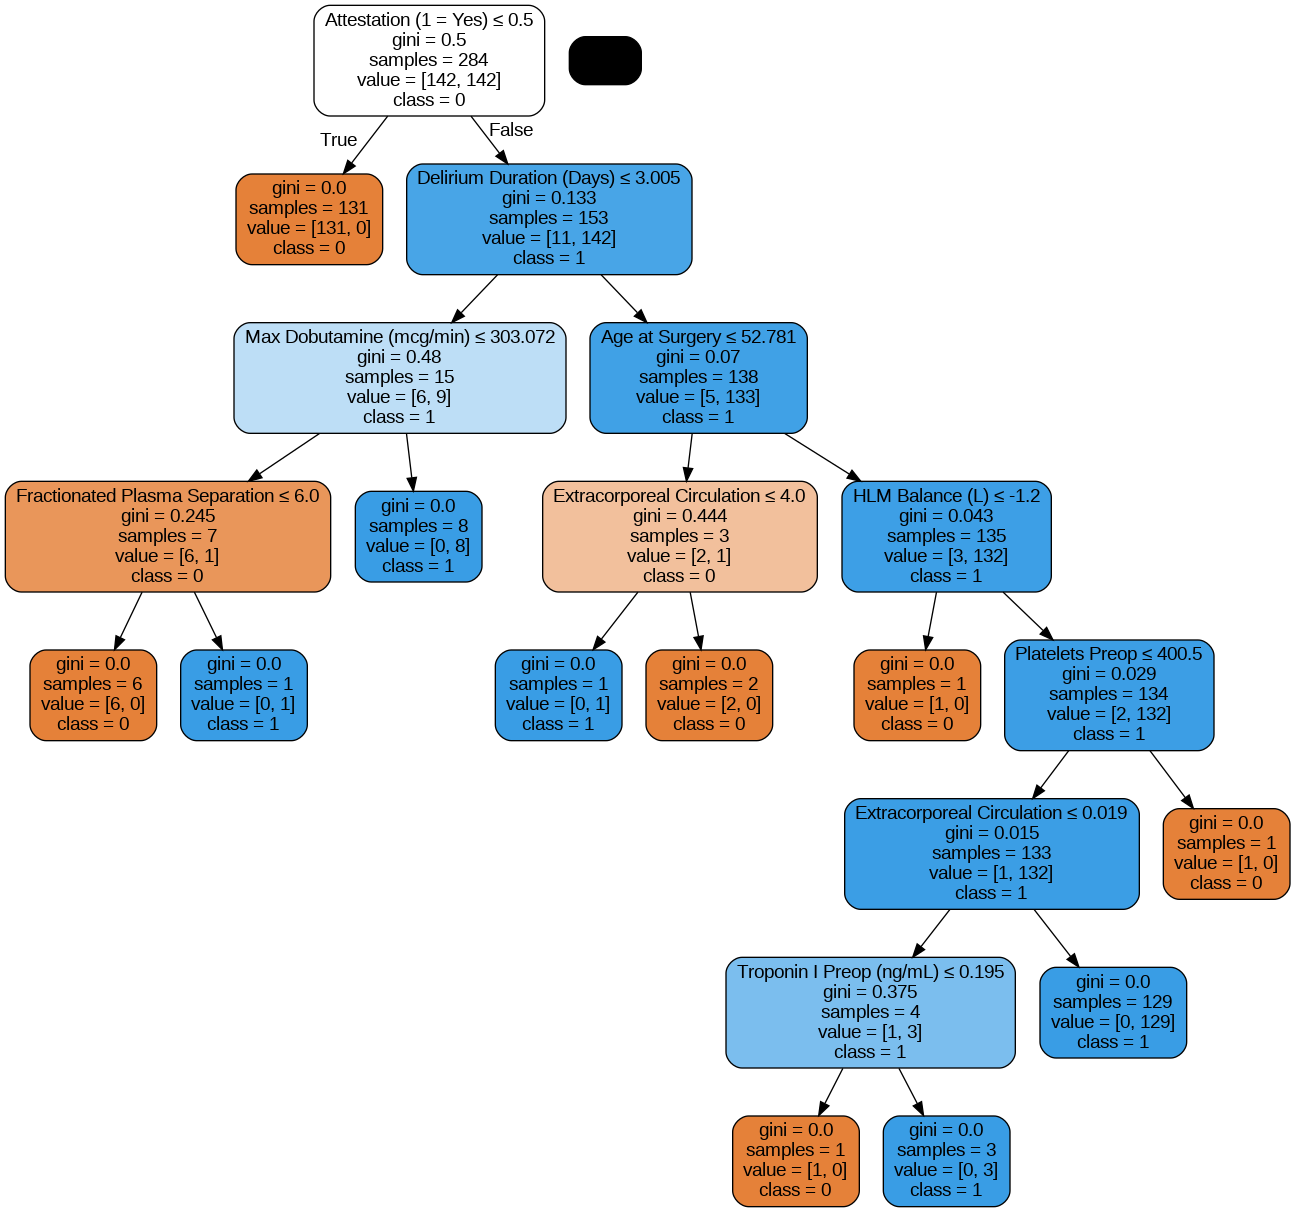

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('delirium.png')
Image(graph.create_png())

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        61
         1.0       0.89      0.94      0.91        17

    accuracy                           0.96        78
   macro avg       0.94      0.95      0.94        78
weighted avg       0.96      0.96      0.96        78



##Using LazyPredict

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict import Supervised
from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
for i in range(29):
    print(i+1, lazypredict.Supervised.CLASSIFIERS[i][0])

1 AdaBoostClassifier
2 BaggingClassifier
3 BernoulliNB
4 CalibratedClassifierCV
5 CategoricalNB
6 DecisionTreeClassifier
7 DummyClassifier
8 ExtraTreeClassifier
9 ExtraTreesClassifier
10 GaussianNB
11 KNeighborsClassifier
12 LabelPropagation
13 LabelSpreading
14 LinearDiscriminantAnalysis
15 LinearSVC
16 LogisticRegression
17 NearestCentroid
18 NuSVC
19 PassiveAggressiveClassifier
20 Perceptron
21 QuadraticDiscriminantAnalysis
22 RandomForestClassifier
23 RidgeClassifier
24 RidgeClassifierCV
25 SGDClassifier
26 SVC
27 StackingClassifier
28 XGBClassifier
29 LGBMClassifier


In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     random_state=12,
                     classifiers='all',
                    )
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 12.61it/s]

[LightGBM] [Info] Number of positive: 142, number of negative: 142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2427
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [ ]:
models
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.98,0.98,0.96,0.16
XGBClassifier,0.96,0.98,0.98,0.96,0.10
BernoulliNB,0.95,0.97,0.97,0.95,0.10
ExtraTreesClassifier,0.95,0.97,0.97,0.95,0.60
RandomForestClassifier,0.95,0.97,0.97,0.95,0.26
BaggingClassifier,0.95,0.97,0.97,0.95,0.28
LinearDiscriminantAnalysis,0.94,0.96,0.96,0.94,0.21
RidgeClassifierCV,0.94,0.96,0.96,0.94,0.13
RidgeClassifier,0.94,0.96,0.96,0.94,0.03


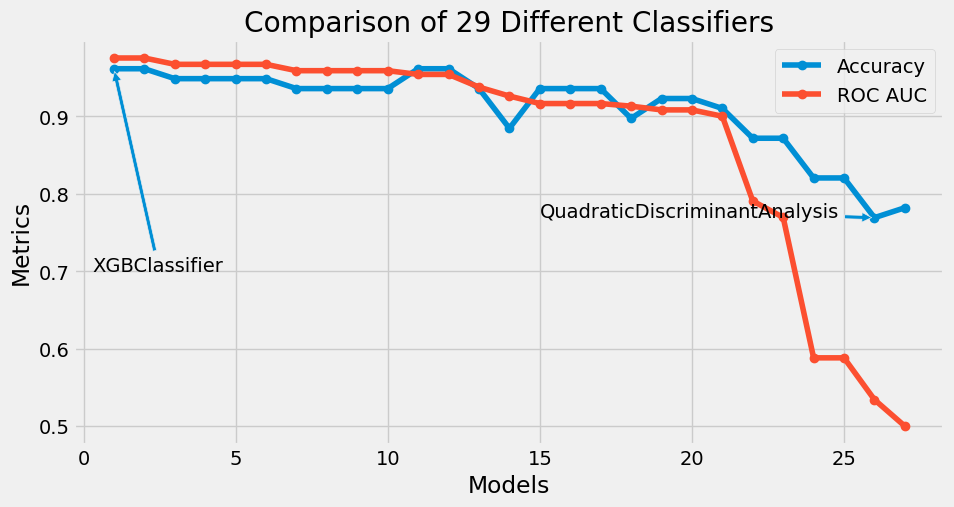

In [ ]:
idx = [i for i in range(1,28)]
plt.plot(idx, models["Accuracy"]  ,marker='o' , label = "Accuracy" )
plt.plot(idx , models["ROC AUC"] , marker ='o' , label = "ROC AUC")
plt.annotate(models.index[1] ,
             (1,models["Accuracy"][1]) ,
             xytext  =(0.3, 00.7),
             arrowprops = dict(
                               arrowstyle = "simple"
                              ))
plt.annotate(models.index[25] ,
             (26 , models["Accuracy"][25]) ,
             xytext  =(15, models["Accuracy"][25]),
             arrowprops = dict(
                               arrowstyle = "simple"
                              ))
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.title("Comparison of 29 Different Classifiers")
plt.legend()
plt.show()